In [1]:
!pip install soccerdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.5 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47047 sha256=4d1d73df133d75098878216fb339f0750967f891941bfc5cc3f3e241b0f50e4f
  Stored in directory: /root/.cache/pip/wheels/5c/b9/03/4b6e38f019d6170e8c25df2e1e362d7bdf9ff4012df2dc85c0
Successfully built undetected-chromedri

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/08/25 18:53:29] INFO     No custom team name replacements found. You can configure these in       ]8;id=337846;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=352656;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=282342;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=158900;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#197\197]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="Big 5 European Leagues Combined", seasons=2425)
print(fbref.__doc__)

[06/08/25 18:53:31] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=844008;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=530975;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/08/25 18:53:38] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=91988;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=260534;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born  \
                                                                          
league             season team    player                                  
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997   
                                  Bukayo Saka      ENG  FW,MF  22  2001   
                                  David Raya       ESP     GK  28  1995   
                                  Declan Rice      ENG     MF  25  1999   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   

                                                Playing Time               \
                                                          MP Starts   Min   
league             season team    player                                    
ENG-Premier League 2425   Arsenal Ben White               17     13  1198   
                                  Bukayo Saka             25     20  1729   
                                  David Raya              38     38  3420   
                                  Declan Rice             35     33  2825   
                                  Ethan Nwaneri           26     11   895   

                                                      Performance      ...  \
                                                  90s         Gls Ast  ...   
league             season team    player                               ...   
ENG-Premier League 2425   Arsenal Ben White      13.3           0   2  ...   
                                  Bukayo Saka    19.2           6  10  ...   
                                  David Raya     38.0           0   0  ...   
                                  Declan Rice    31.4           4   7  ...   
                                  Ethan Nwaneri   9.9           4   2  ...   

                                                Per 90 Minutes              \
                                                           Gls   Ast   G+A   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White                0.0  0.15  0.15   
                                  Bukayo Saka             0.31  0.52  0.83   
                                  David Raya               0.0   0.0   0.0   
                                  Declan Rice             0.13  0.22  0.35   
                                  Ethan Nwaneri            0.4   0.2   0.6   

                                                                          \
                                                 G-PK G+A-PK    xG   xAG   
league             season team    player                                   
ENG-Premier League 2425   Arsenal Ben White       0.0   0.15  0.03   0.1   
                                  Bukayo Saka    0.26   0.78  0.36   0.4   
                                  David Raya      0.0    0.0   0.0   0.0   
                                  Declan Rice    0.13   0.35  0.11  0.21   
                                  Ethan Nwaneri   0.4    0.6  0.12  0.12   

                                                                       
                                                xG+xAG  npxG npxG+xAG  
league             season team    player                               
ENG-Premier League 2425   Arsenal Ben White       0.14  0.03     0.14  
                                  Bukayo Saka     0.75  0.31     0.71  
                                  David Raya       0.0   0.0      0.0  
                                  Declan Rice     0.32  0.11     0.32  
                                  Ethan Nwaneri   0.24  0.12     0.24  

[5 rows x 33 columns]

In [6]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

  Playing Time         ... Per 90 Minutes                                 \
            MP Starts  ...            Gls   Ast   G+A  G-PK G+A-PK    xG   
0           17     13  ...            0.0  0.15  0.15   0.0   0.15  0.03   
1           25     20  ...           0.31  0.52  0.83  0.26   0.78  0.36   
2           38     38  ...            0.0   0.0   0.0   0.0    0.0   0.0   
3           35     33  ...           0.13  0.22  0.35  0.13   0.35  0.11   
4           26     11  ...            0.4   0.2   0.6   0.4    0.6  0.12   

                               
    xAG xG+xAG  npxG npxG+xAG  
0   0.1   0.14  0.03     0.14  
1   0.4   0.75  0.31     0.71  
2   0.0    0.0   0.0      0.0  
3  0.21   0.32  0.11     0.32  
4  0.12   0.24  0.12     0.24  

[5 rows x 37 columns]

In [7]:
player_season_mis = fbref.read_player_season_stats(stat_type="misc")
player_season_mis.head()

[06/08/25 18:53:53] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=866627;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=803302;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Performance                 \
                                                       CrdY CrdR 2CrdY Fls   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White               2    0     0  10   
                                  Bukayo Saka             3    0     0  15   
                                  David Raya              3    0     0   1   
                                  Declan Rice             7    1     1  21   
                                  Ethan Nwaneri           1    0     0   9   

                                                     ...                      \
                                                Fld  ...  Crs Int TklW PKwon   
league             season team    player             ...                       
ENG-Premier League 2425   Arsenal Ben White       5  ...   17  16   14     0   
                                  Bukayo Saka    39  ...  117   3   15     1   
                                  David Raya     10  ...    0   2    0     0   
                                  Declan Rice    16  ...  164  25   25     0   
                                  Ethan Nwaneri   5  ...   54   2    7     0   

                                                               Aerial Duels  \
                                                PKcon OG Recov          Won   
league             season team    player                                      
ENG-Premier League 2425   Arsenal Ben White         0  0    37           18   
                                  Bukayo Saka       0  0    70           10   
                                  David Raya        1  0    41           13   
                                  Declan Rice       0  0   156           37   
                                  Ethan Nwaneri     0  0    34            4   

                                                             
                                                Lost   Won%  
league             season team    player                     
ENG-Premier League 2425   Arsenal Ben White        9   66.7  
                                  Bukayo Saka     20   33.3  
                                  David Raya       0  100.0  
                                  Declan Rice     25   59.7  
                                  Ethan Nwaneri    8   33.3  

[5 rows x 21 columns]

In [8]:
player_season_mis = player_season_mis.reset_index()
print(player_season_mis.columns)
player_season_mis.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Performance  ...                                    Aerial Duels       \
               CrdY  ...  Crs Int TklW PKwon PKcon OG Recov          Won Lost   
0  13.3           2  ...   17  16   14     0     0  0    37           18    9   
1  19.2           3  ...  117   3   15     1     0  0    70           10   20   
2  38.0           3  ...    0   2    0     0     1  0    41           13    0   
3  31.4           7  ...  164  25   25     0     0  0   156           37   25   
4   9.9           1  ...   54   2    7     0     0  0    34            4    8   

          
    Won%  
0   66.7  
1   33.3  
2  100.0  
3   59.7  
4   33.3  

[5 rows x 25 columns]

In [9]:
player_season_def = fbref.read_player_season_stats(stat_type="defense")
player_season_def.head()

[06/08/25 18:54:13] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=602144;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=358445;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Tackles                       \
                                                    Tkl TklW Def 3rd Mid 3rd   
league             season team    player                                       
ENG-Premier League 2425   Arsenal Ben White          20   14      10       4   
                                  Bukayo Saka        29   15       9      11   
                                  David Raya          0    0       0       0   
                                  Declan Rice        53   25      22      25   
                                  Ethan Nwaneri      11    7       4       4   

                                                         ... Challenges        \
                                                Att 3rd  ...        Att  Tkl%   
league             season team    player                 ...                    
ENG-Premier League 2425   Arsenal Ben White           6  ...         38  42.1   
                                  Bukayo Saka         9  ...         24  54.2   
                                  David Raya          0  ...          2   0.0   
                                  Declan Rice         6  ...         41  41.5   
                                  Ethan Nwaneri       3  ...         21  33.3   

                                                     Blocks          Int  \
                                                Lost Blocks  Sh Pass       
league             season team    player                                   
ENG-Premier League 2425   Arsenal Ben White       22     10   8    2  16   
                                  Bukayo Saka     11     22   0   22   3   
                                  David Raya       2      0   0    0   2   
                                  Declan Rice     24     27  13   14  25   
                                  Ethan Nwaneri   14      8   2    6   2   

                                                Tkl+Int Clr Err  
                                                                 
league             season team    player                         
ENG-Premier League 2425   Arsenal Ben White          36  44   0  
                                  Bukayo Saka        32   8   0  
                                  David Raya          2  21   9  
                                  Declan Rice        78  51   0  
                                  Ethan Nwaneri      13   4   1  

[5 rows x 21 columns]

In [10]:
player_season_def = player_season_def.reset_index()
print(player_season_def.columns)
player_season_def.head()

MultiIndex([(    'league',        ''),
            (    'season',        ''),
            (      'team',        ''),
            (    'player',        ''),
            (    'nation',        ''),
            (       'pos',        ''),
            (       'age',        ''),
            (      'born',        ''),
            (       '90s',        ''),
            (   'Tackles',     'Tkl'),
            (   'Tackles',    'TklW'),
            (   'Tackles', 'Def 3rd'),
            (   'Tackles', 'Mid 3rd'),
            (   'Tackles', 'Att 3rd'),
            ('Challenges',     'Tkl'),
            ('Challenges',     'Att'),
            ('Challenges',    'Tkl%'),
            ('Challenges',    'Lost'),
            (    'Blocks',  'Blocks'),
            (    'Blocks',      'Sh'),
            (    'Blocks',    'Pass'),
            (       'Int',        ''),
            (   'Tkl+Int',        ''),
            (       'Clr',        ''),
            (       'Err',        '')],
           )


league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Tackles  ... Challenges            Blocks          Int Tkl+Int Clr Err  
            Tkl  ...        Att  Tkl% Lost Blocks  Sh Pass                      
0  13.3      20  ...         38  42.1   22     10   8    2  16      36  44   0  
1  19.2      29  ...         24  54.2   11     22   0   22   3      32   8   0  
2  38.0       0  ...          2   0.0    2      0   0    0   2       2  21   9  
3  31.4      53  ...         41  41.5   24     27  13   14  25      78  51   0  
4   9.9      11  ...         21  33.3   14      8   2    6   2      13   4   1  

[5 rows x 25 columns]

In [11]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_mis.columns = ['_'.join(col).strip() for col in player_season_mis.columns]
player_season_def.columns = ['_'.join(col).strip() for col in player_season_def.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_mis.columns)
print(player_season_def.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [12]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','age_','Playing Time_Min','Progression_PrgC', 'Progression_PrgP',]
]
df_mis_selected = player_season_mis[
    ['player_', 'team_','Performance_CrdY','Performance_CrdR', 'Performance_2CrdY', 'Performance_Fls','Performance_Int','Performance_Recov','Aerial Duels_Won', 'Aerial Duels_Lost', 'Aerial Duels_Won%']
]
df_def_selected = player_season_def[
    ['player_', 'team_','Tackles_Tkl', 'Tackles_TklW','Clr_', 'Err_',]
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_mis_selected, on=['player_', 'team_'], how='inner')
df_merged= pd.merge(df_merged_1, df_def_selected, on=['player_', 'team_'], how='inner')
# 5. Exibir o resultado
print(df_merged.head())
print(f"Número de linhas: {len(df_merged)}")

         player_    team_   pos_  age_  Playing Time_Min  Progression_PrgC  \
0      Ben White  Arsenal     DF    26              1198                23   
1    Bukayo Saka  Arsenal  FW,MF    22              1729                96   
2     David Raya  Arsenal     GK    28              3420                 0   
3    Declan Rice  Arsenal     MF    25              2825                90   
4  Ethan Nwaneri  Arsenal  FW,MF    17               895                46   

   Progression_PrgP  Performance_CrdY  Performance_CrdR  Performance_2CrdY  \
0                59                 2                 0                  0   
1                70                 3                 0                  0   
2                14                 3                 0                  0   
3               192                 7                 1                  1   
4                33                 1                 0                  0   

   Performance_Fls  Performance_Int  Performance_Recov  Aerial

In [13]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Defesas(DF) e Meias (MF)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|DF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem

print(filtered_data.head())
print(f"Número de linhas: {len(filtered_data)}")

            player_        team_ pos_  age_  Playing Time_Min  \
3       Declan Rice      Arsenal   MF    25              2825   
9          Jorginho      Arsenal   MF    32               704   
14  Martin Ødegaard      Arsenal   MF    25              2325   
25     Amadou Onana  Aston Villa   MF    22              1617   
28  Boubacar Kamara  Aston Villa   MF    24              1726   

    Progression_PrgC  Progression_PrgP  Performance_CrdY  Performance_CrdR  \
3                 90               192                 7                 1   
9                 12                48                 5                 0   
14                92               258                 4                 0   
25                29                75                 4                 0   
28                19                85                 2                 0   

    Performance_2CrdY  Performance_Fls  Performance_Int  Performance_Recov  \
3                   1               21               25       

In [14]:
# Selecionar as colunas desejadas para análise
Vol = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('age_'),
    ('Playing Time_Min'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Performance_CrdY'),
    ('Performance_CrdR'),
    ('Performance_2CrdY'),
    ('Performance_Fls'),
    ('Performance_Int'),
    ('Performance_Recov'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
    ('Aerial Duels_Won%'),
    ('Tackles_Tkl'),
    ('Tackles_TklW'),
    ('Clr_'),
    ('Err_'),
]]

# Renomear as colunas para facilitar o uso
Vol.columns = ['jogador','time','posicao','idade', 'Minutos','Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros',]

# Exportar o dataframe para um arquivo CSV
Vol.to_csv('Vol_data.csv', index=False, encoding='utf-8-sig')

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Vol.head())

# Remover jogadores com todas as métricas iguais a 0
#Vol = Vol[(Vol[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls','Desarmes Totais','Desarmes%','Interceptacao','Desarmes Certos','Cross',]] != 0).any(axis=1)]



            jogador         time posicao  idade  Minutos  Prgc  PrgP  Amarelo  \
3       Declan Rice      Arsenal      MF     25     2825    90   192        7   
9          Jorginho      Arsenal      MF     32      704    12    48        5   
14  Martin Ødegaard      Arsenal      MF     25     2325    92   258        4   
25     Amadou Onana  Aston Villa      MF     22     1617    29    75        4   
28  Boubacar Kamara  Aston Villa      MF     24     1726    19    85        2   

    Vermelho  2 Amarelo  Falta Cometida  interceptacao  recuperacoes  \
3          1          1              21             25           156   
9          0          0              15              7            55   
14         0          0              12              6            97   
25         0          0              32             26            72   
28         0          0              30             19            87   

    Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W%  Divididas Total  \
3 

### **2. Criar modelos de classificação para  (Volantes)**

In [15]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Vol[['Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Vol['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Vol[['Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros']])

      Prgc  PrgP  Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  \
3       90   192        7         1          1              21             25   
9       12    48        5         0          0              15              7   
14      92   258        4         0          0              12              6   
25      29    75        4         0          0              32             26   
28      19    85        2         0          0              30             19   
...    ...   ...      ...       ...        ...             ...            ...   
2833    60    95        4         0          0              26             19   
2835    20   140        7         1          1              50             28   
2837    12    22        0         0          0              18              9   
2843    18    60        4         0          0              31             10   
2844     7    24        1         0          0               7              6   

      recuperacoes  Duelos 

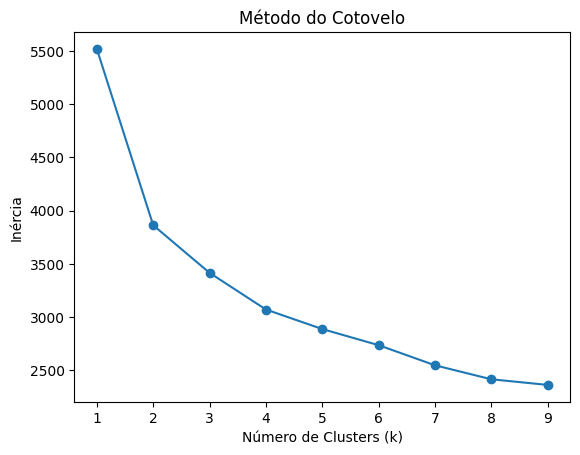

In [16]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [17]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [18]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Vol.groupby('Cluster').agg({col: 'mean' for col in Vol.select_dtypes(include=['number']).columns})
print(cluster_summary)

             idade      Minutos       Prgc        PrgP   Amarelo  Vermelho  \
Cluster                                                                      
0        26.065217   2340.26087  64.065217  178.326087   4.26087  0.086957   
1        24.147059  2178.676471  30.235294  114.264706  7.264706  1.205882   
2        26.418182  2638.818182  30.309091  135.781818  7.327273  0.090909   
3        25.404255  1075.014184  16.404255    56.93617  2.666667  0.049645   
4        25.293478  1913.423913  21.521739   90.521739   5.51087  0.130435   

         2 Amarelo  Falta Cometida  interceptacao  recuperacoes  \
Cluster                                                           
0              0.0       25.347826      16.869565    127.043478   
1         1.029412       38.558824      22.941176    128.676471   
2              0.0       44.945455      34.781818    149.327273   
3              0.0       15.836879       9.687943     54.695035   
4              0.0        30.98913          22.75  

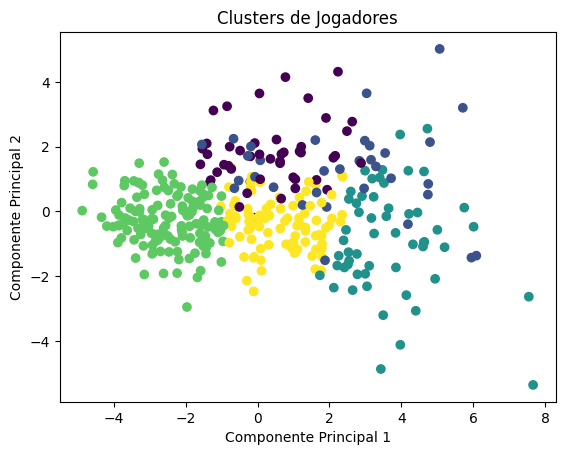

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [20]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Vol.select_dtypes(include=np.number).columns
correlation_matrix = Vol[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                      idade   Minutos      Prgc      PrgP   Amarelo  Vermelho  \
idade              1.000000  0.069175 -0.071749  0.171270  0.045409 -0.076476   
Minutos            0.069175  1.000000  0.573913  0.734130  0.544424  0.157655   
Prgc              -0.071749  0.573913  1.000000  0.658376  0.150453  0.051737   
PrgP               0.171270  0.734130  0.658376  1.000000  0.287704  0.116632   
Amarelo            0.045409  0.544424  0.150453  0.287704  1.000000  0.226232   
Vermelho          -0.076476  0.157655  0.051737  0.116632  0.226232  1.000000   
2 Amarelo         -0.119132  0.174449  0.045226  0.082252  0.287202  0.739715   
Falta Cometida     0.024590  0.655845  0.210646  0.308520  0.698171  0.223701   
interceptacao      0.033018  0.689075  0.130827  0.389849  0.490555  0.157139   
recuperacoes       0.074527  0.896272  0.501897  0.751025  0.514189  0.199175   
Duelos Aereoes W   0.112795  0.507611  0.053876  0.196907  0.372709  0.105204   
Duelos Aereoes L   0.040220 

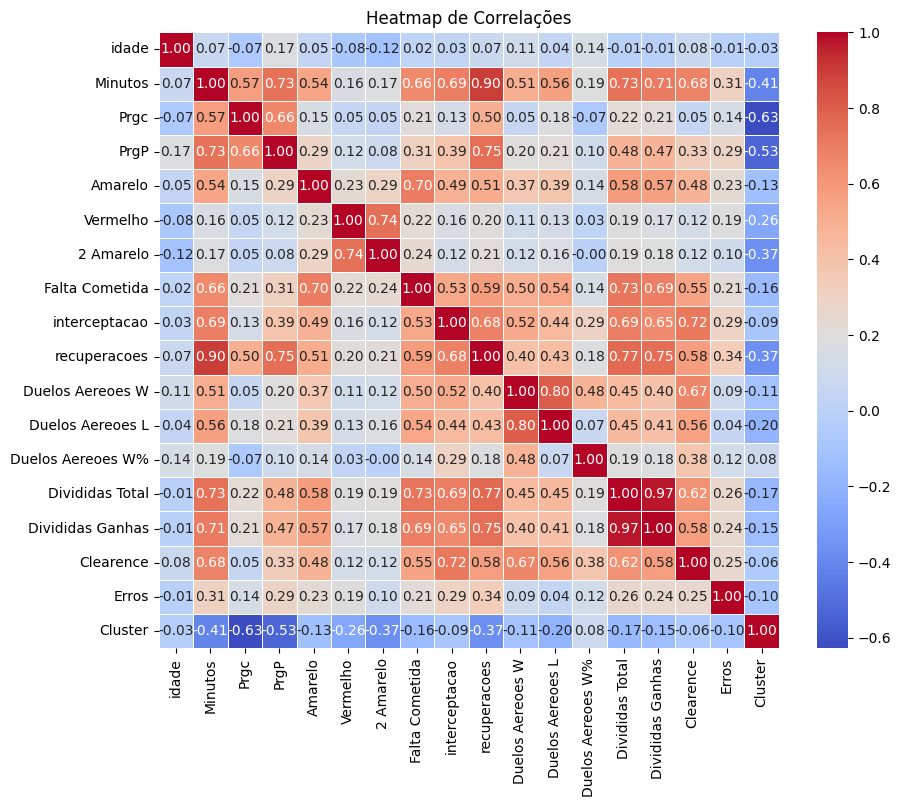

In [21]:
plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()


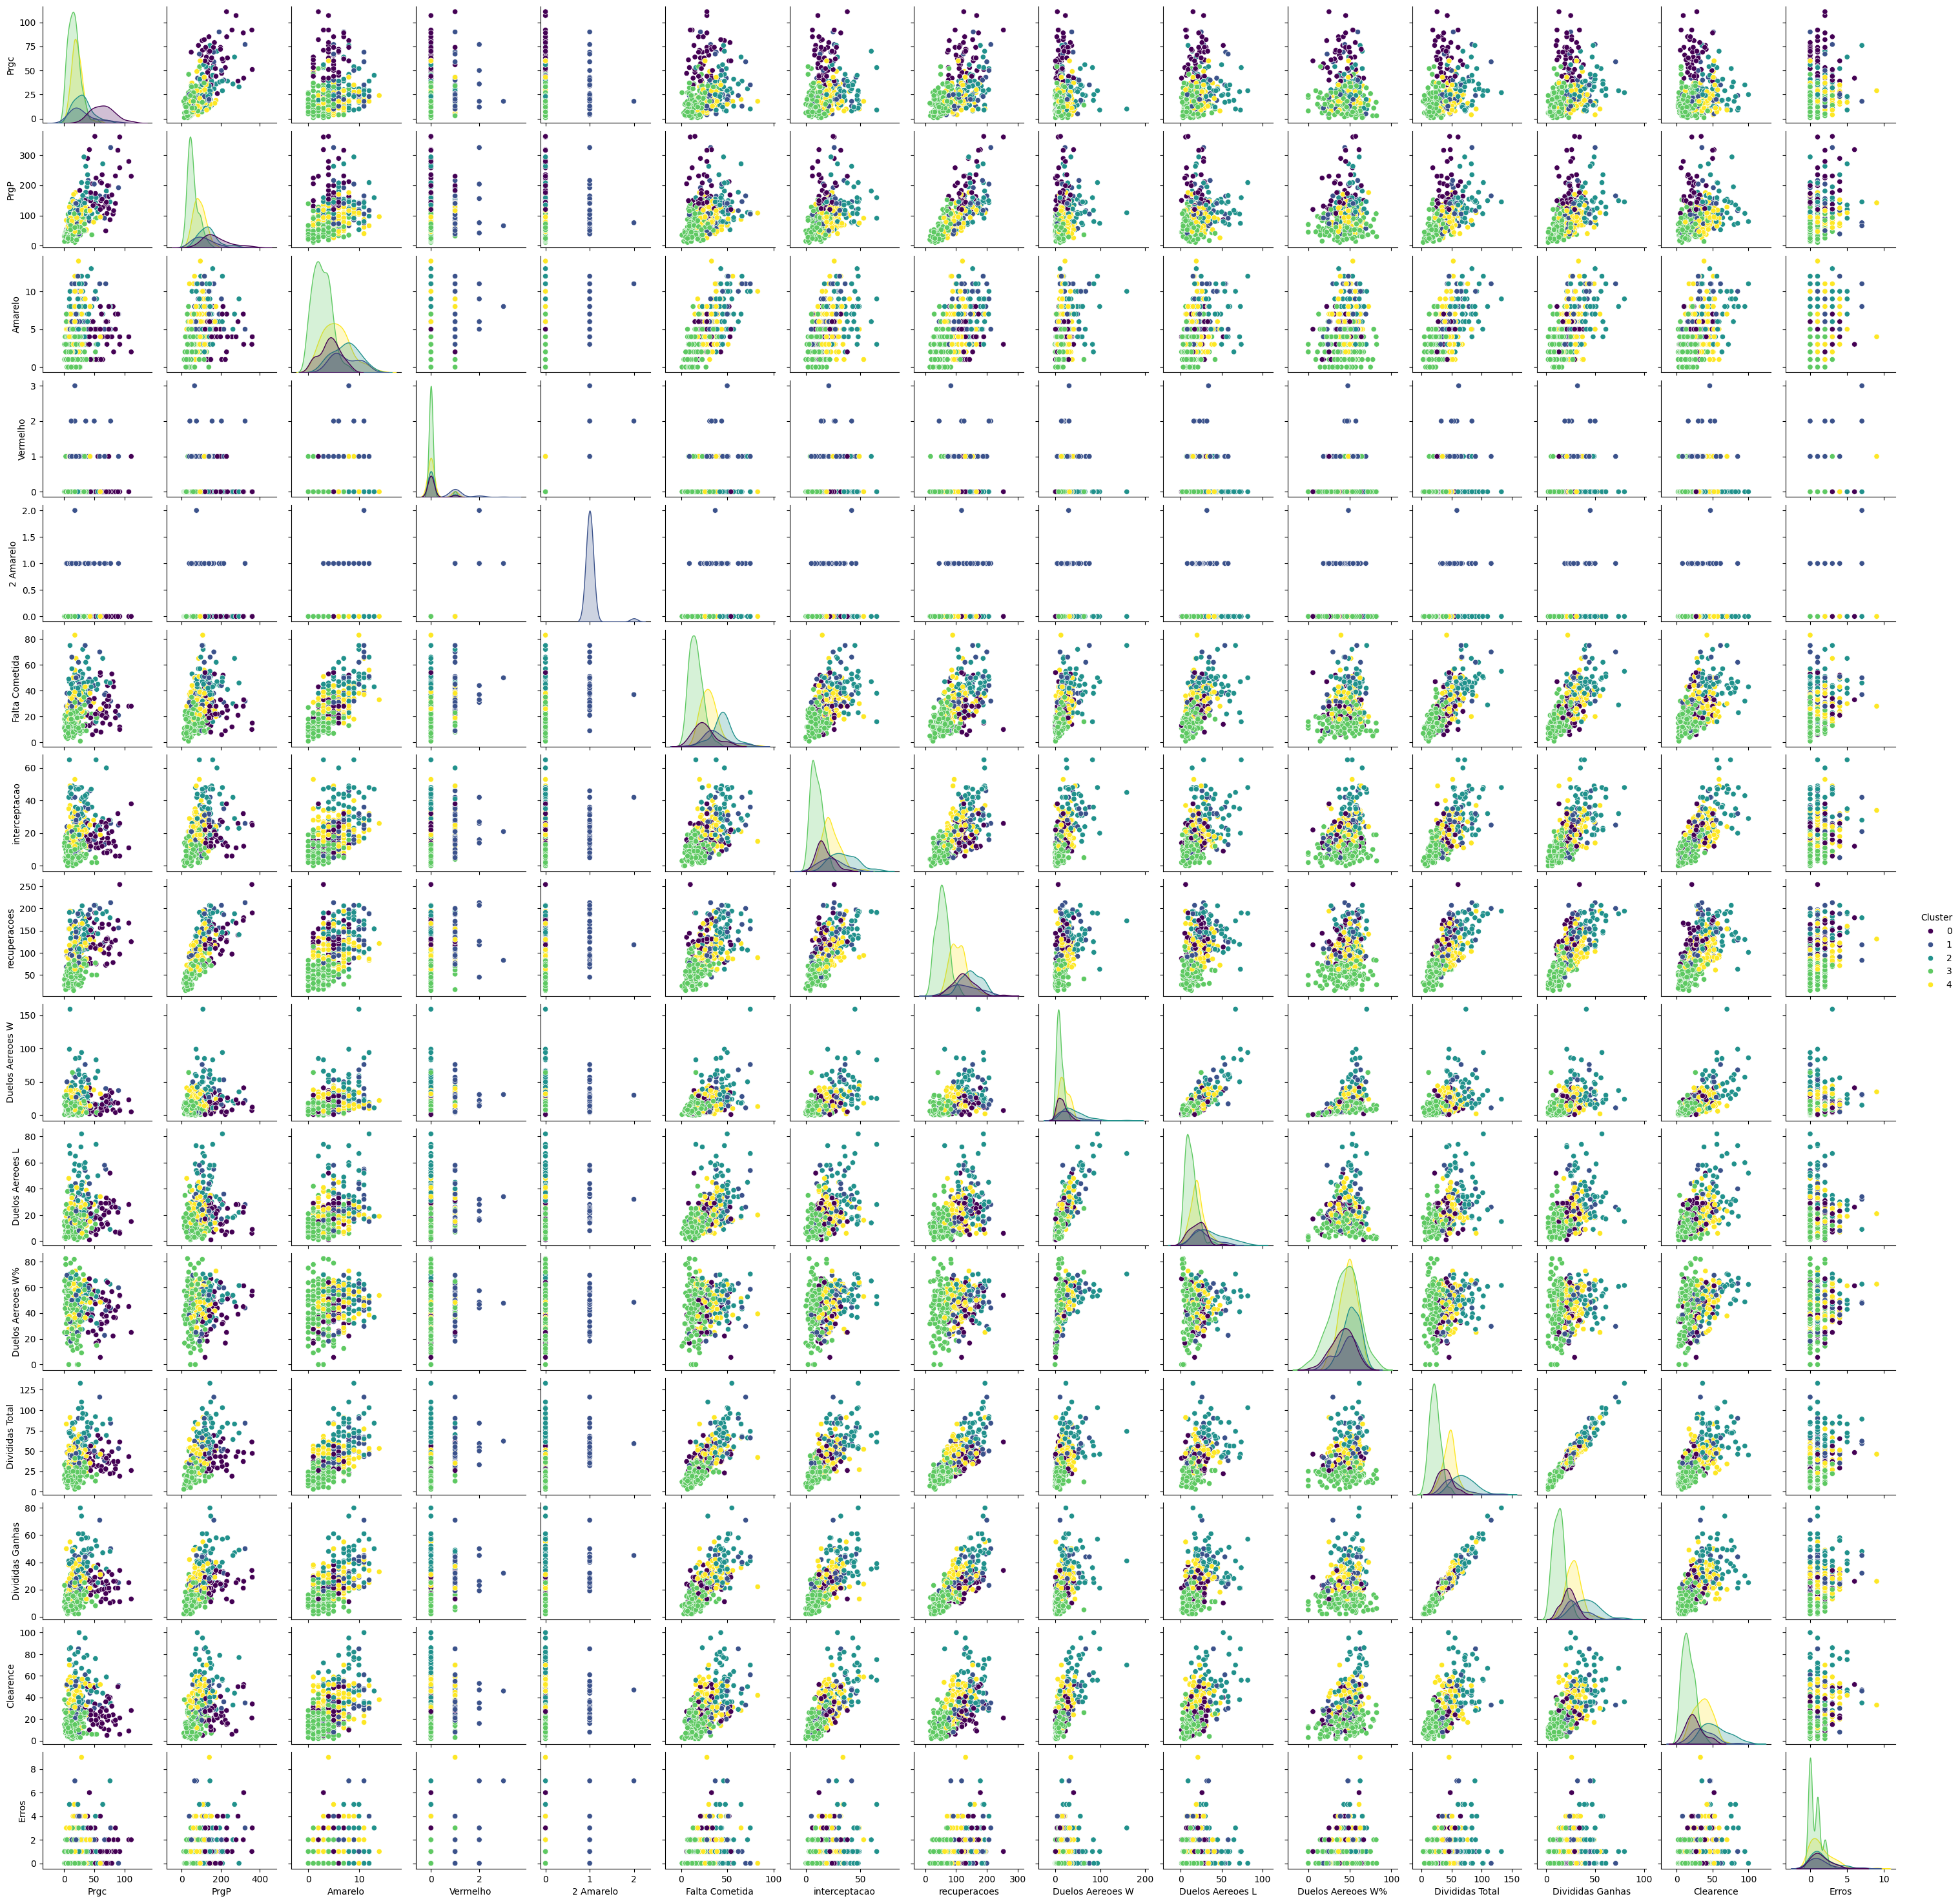

In [22]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Vol[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Análise dos Gráficos e das Correlações no Heatmap**

A análise será feita com foco nos volantes, considerando as métricas apresentadas no heatmap e os padrões observados nos gráficos de dispersão.


---

### 🛡️ Análise de Correlação – Volantes das Top 5 Ligas (2024)

O heatmap revela como variáveis defensivas, de combate e distribuição se relacionam no desempenho dos **volantes**. Principais destaques:

---

### 🧱 Correlações Fortes Positivas

**`recuperacoes` ↔ Minutos / Prg / PrgP / Duelos Aéreos W / Divididas**
📈 Volantes que recuperam mais bolas tendem a:

* Jogar mais minutos (`0.75`)
* Acertar mais passes (`Prg`: `0.75`)
* Contribuir com passes progressivos (`PrgP`: `0.75`)
* Vencer duelos aéreos (`0.52`)
* Estar mais envolvidos nas **divididas totais** (`0.77`) e **ganhas** (`0.65`)

🔧 Mostra um perfil de **volante box-to-box**, com forte contribuição defensiva e construção de jogadas.

---

**`interceptacao` ↔ Falta Cometida / Duelos Aéreos / Divididas / Clearence**
📊 Jogadores com mais interceptações também se destacam em:

* Cometer mais faltas (`0.59`), sugerindo **pressão intensa no portador da bola**
* Duelos aéreos ganhos (`0.54`) e perdidos (`0.44`) – ou seja, disputam bastante
* Desarmes e alívios (`Clearence`: `0.72`)

⚙️ Indica o típico **volante de contenção**, que atua quebrando a linha do adversário com alto volume defensivo.

---

**`Duelos Aéreos W ↔ Clearence / Divididas / Minutos`**
🛫 Vencer duelos aéreos mostra correlação com:

* Desarmes (`0.54`)
* Minutos jogados (`0.51`)
* Clearences (`0.58`)

🧠 Mostra como a **presença física** e tempo de jogo ajudam a consolidar esse estilo de volante.

---

### 📉 Correlações Fortes Negativas

**Cluster ↔ PrgP / Prg / Recuperações / Minutos**
📉 A variável `Cluster` (provavelmente indicando **agrupamentos de estilo**) tem correlação negativa com:

* Passes progressivos (`PrgP`: `-0.53`)
* Passes certos (`Prg`: `-0.53`)
* Recuperações (`-0.37`)
* Minutos (`-0.41`)

⚠️ Sugere que **jogadores menos participativos em construção e defensiva intensa** estão agrupados em clusters distintos (talvez volantes de menor uso ou função tática mais restrita).

---

### 👀 Outras Observações

* **Erros** têm correlação baixa com variáveis principais (máximo `0.34`), indicando que o erro não é um fator dominante entre os melhores volantes.
* **Cartões** (Amarelo, Vermelho e 2º Amarelo) têm **correlação baixa a moderada** com ações defensivas – indicando que intensidade defensiva não necessariamente se traduz em punições.


---
---



---

## 🛡️ Perfis dos Clusters – Volantes

---

### 🟢 Cluster 0 – **Volantes Equilibrados com Boa Presença Defensiva**

📊 **Destaques**:

* Boa minutagem (2340), idade média razoável (26 anos)
* Bons números de **recuperações (127)** e **interceptações (16.8)**
* Participação moderada em duelos aéreos, com **41% de aproveitamento**
* Disciplinados: cartões baixos (Amarelo: 4.26, Vermelho: 0.08)
* Divididas e desarmes razoáveis, poucos erros (1.47)

🔎 **Resumo**: Volantes com boa leitura defensiva, eficientes na retomada da bola e seguros na distribuição. Ideal para sistemas táticos mais compactos.
👤 **Perfil**: **volante clássico e equilibrado**, estilo Allan (do Flamengo), Danilo (ex-Palmeiras).

---

### 🔴 Cluster 1 – **Volantes de Contenção com Estilo Pegador**

📊 **Destaques**:

* Alta minutagem (2638), média de idade semelhante ao grupo 0
* **Altíssimo número de recuperações (149)**, interceptações (34.8) e faltas cometidas (44.9)
* Bastante faltoso: **mais cartões** (Amarelo: 7.3)
* Participação forte em duelos aéreos: **W: 42.1 | Win%: 51.8**
* Boas divididas (70), mas maior número de erros (2.0)

🔎 **Resumo**: Volantes físicos, agressivos na marcação e intensos nas disputas. Costumam assumir a sujeira do meio-campo e desarmar jogadas.
👤 **Perfil**: **primeiro volante cão de guarda**, estilo Felipe Melo / Yago Felipe / Gregore.

---

### 🔵 Cluster 2 – **Volantes Técnicos e de Grande Volume**

📊 **Destaques**:

* **Altíssimo tempo de jogo (2638 minutos)**
* Líderes em **prógressão com a bola (Prgc = 138)** e **passes progressivos (PrgP = 135.8)**
* Excelentes números defensivos: **recuperações (149)**, **interceptações (34.7)**
* Ótimo aproveitamento em duelos aéreos e divididas
* Muito seguros: poucos erros (0.63)

🔎 **Resumo**: Volantes completos, capazes de defender, construir e avançar com a bola. Atuam como **pivôs técnicos** entre defesa e ataque.
👤 **Perfil**: **volante moderno e construtor**, estilo João Gomes / Zubeldía / Enzo Fernández.

---

### 🟣 Cluster 3 – **Volantes Jovens, Leves e Técnicos**

📊 **Destaques**:

* Baixa minutagem (1075) e média de idade baixa (25 anos)
* Menor volume geral, mas com **bom aproveitamento defensivo (43% de duelos ganhos)**
* Pouca agressividade (baixo número de faltas e cartões)
* Erros mínimos (0.29), porém participação ofensiva limitada

🔎 **Resumo**: Volantes mais leves e técnicos, muitas vezes em transição para titularidade. Participam bem do jogo, mas com menos impacto.
👤 **Perfil**: **volante jovem com bom potencial**, estilo André (Fluminense), Pablo Maia (São Paulo).

---

### 🟡 Cluster 4 – **Volantes Polivalentes e Altamente Ativos**

📊 **Destaques**:

* Minutagem média-alta (1913), idade equilibrada (25.3)
* Ativos defensivamente (interceptações: 22.7, recuperações: 106.8)
* **Alta taxa de duelos ganhos (47.9%)** e divididas (47)
* Moderadamente faltosos e bons em cobertura (Clearences: 36.0)
* Erros baixos (1.4)

🔎 **Resumo**: Volantes bem adaptáveis, que ajudam em diferentes fases do jogo. Mostram bons índices defensivos e boa taxa de sucesso nas disputas.
👤 **Perfil**: **volante versátil, confiável e físico**, estilo Richard Ríos, Richard (Ceará), ou Maycon (Corinthians).

---

## 🔍 Comparativo Geral – Clusters de Volantes

| Cluster | Estilo            | Destaques                                                        | Perfil                           |
| ------- | ----------------- | ---------------------------------------------------------------- | -------------------------------- |
| 0       | Equilibrado       | Recuperações, interceptações, poucos erros                       | Volante clássico e seguro        |
| 1       | Pegador/Contenção | Faltas, desarmes, cartões, duelos físicos                        | Primeiro volante físico          |
| 2       | Técnico e moderno | PrgC, PrgP, recuperações, divididas e poucos erros               | Volante moderno/construtor       |
| 3       | Jovem e leve      | Baixa minutagem, técnica, bons duelos, poucos erros              | Promessa com inteligência tática |
| 4       | Polivalente       | Duelos aéreos, divididas, cobertura e boa participação defensiva | Volante físico e versátil        |

---







In [29]:
cluster_names = {
    0: 'volante classico',
    1: 'volante fisico',
    2: 'volante moderno',
    3: 'volante sr',
    4: 'volante versatil',
}

# Adicionar nomes ao DataFrame
Vol['Perfil'] = Vol['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Vol[['jogador','time','posicao','idade', 'Minutos', 'Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros','Perfil']].head())

            jogador         time posicao  idade  Minutos  Prgc  PrgP  Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  recuperacoes  Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W%  Divididas Total  Divididas Ganhas  Clearence  Erros            Perfil
3       Declan Rice      Arsenal      MF     25     2825    90   192        7         1          1              21             25           156                37                25               59.7               53                25         51      0    volante fisico
9          Jorginho      Arsenal      MF     32      704    12    48        5         0          0              15              7            55                 1                 6               14.3               12                 4          2      2        volante sr
14  Martin Ødegaard      Arsenal      MF     25     2325    92   258        4         0          0              12              6            97                 8                 7           

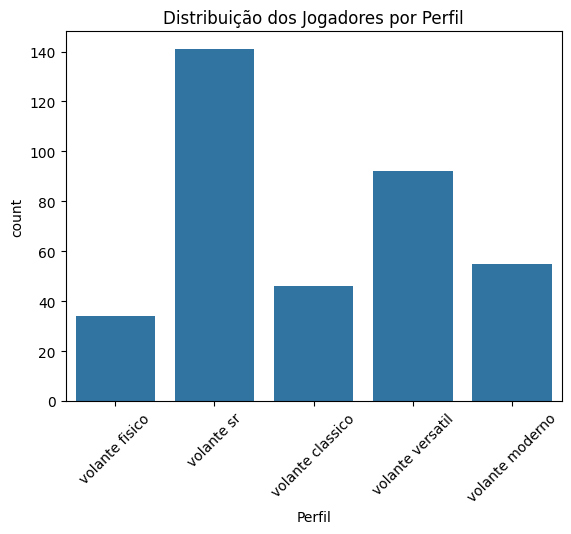

In [30]:
sns.countplot(data=Vol, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [35]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Vol[Vol['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros','Perfil']])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "volante versatil"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: volante versatil
                jogador         time posicao  idade  Minutos  Prgc  PrgP  Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  recuperacoes  Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W%  Divididas Total  Divididas Ganhas  Clearence  Erros            Perfil
25         Amadou Onana  Aston Villa      MF     22     1617    29    75        4         0          0              32             26            72                32                21               60.4               55                30         41      3  volante versatil
28      Boubacar Kamara  Aston Villa      MF     24     1726    19    85        2         0          0              30             19            87                21                26               44.7               50                21         51      3  volante versatil
106       Vitaly Janelt    Brentford      MF     26     2254    17    80        3         0          0              24             27      

In [38]:
# Dicionário dos peso para cada métrica
pesos = {
    'Amarelo': -5,
    'Vermelho': -10,
    'Falta Cometida' : -2,
    'interceptacao': 2,
    'recuperacoes': 2,
    'Duelos Aereoes W': 4,
    'Divididas Ganhas': 6,
    'Clearence': 5,
    'Erros' : 1,

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Vol[coluna + '_Pontuacao'] = Vol[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Vol['Pontuacao_Total'] = Vol[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Vol['Pontuacao_Total'].min()
max_pontuacao = Vol['Pontuacao_Total'].max()
Vol['Pontuacao'] = (
    (Vol['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'volante moderno'
jogadores_filtrados = Vol[Vol['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: volante moderno
 Ranking            time posicao                    jogador          Perfil  Pontuacao
       1         Osasuna      MF                Lucas Torró volante moderno      100.0
       2           Lille      MF             Benjamin André volante moderno   88.83357
       3        Mainz 05      MF                Kaishu Sano volante moderno  87.411095
       4 Nott'ham Forest      MF            Elliot Anderson volante moderno   85.98862
       5      Strasbourg      MF              Andrey Santos volante moderno  85.846373
       6       Brentford      MF         Christian Nørgaard volante moderno  79.943101
       7  Leicester City      MF              Wilfred Ndidi volante moderno  77.169275
       8      Heidenheim      MF              Jan Schöppner volante moderno  75.604552
       9   Holstein Kiel      MF            Nicolai Remberg volante moderno  74.679943
      10           Genoa      MF            Morten Frendrup volante moderno  74.1

In [27]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'volante defensivos'  # Defina o perfil desejado
jogadores_filtrados = Vol[Vol['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))
6

Jogadores disponíveis no perfil 'volante defensivos': ['Youri Tielemans', 'Ryan Christie', 'Tyler Adams', 'Christian Nørgaard', 'Idrissa Gana Gueye', 'Saša Lukić', 'Sam Morsy', 'Wilfred Ndidi', 'Alexis Mac Allister', 'Ryan Gravenberch', 'Bruno Guimarães', 'Elliot Anderson', 'Ryan Yates', 'Mateus Fernandes', 'Tomáš Souček', 'Mikel Jauregizar', 'Johnny Cardoso', 'Luis Milla', 'Mauro Arambarri', 'Yangel Herrera', 'Lucas Torró', 'Óscar Valentín', 'Martín Zubimendi', 'Lucien Agoume', 'Santi Comesaña', 'Elisha Owusu', 'Adrien Thomasson', 'Benjamin André', 'Corentin Tolisso', 'Pierre Højbjerg', 'Douglas', 'Hicham Boudaoui', 'Valentin Atangana Edoa', 'Pierre Ekwah Elimby', 'Andrey Santos', 'Cristian Cásseres Jr.', 'Frank Onyeka', 'Matúš Bero', 'Maximilian Eggestein', 'Julian Weigl', 'Jan Schöppner', 'Nicolai Remberg', 'Kaishu Sano', 'Lee Jae-sung', 'Jackson Irvine', 'Rani Khedira', 'Senne Lynen', 'Remo Freuler', 'Morten Frendrup', 'Manuel Locatelli', 'Nicolò Rovella', 'Andre-Frank Zambo Anguis

6


Jogadores selecionados: Andreas Pereira, Casemiro, Pedri, Martín Zubimendi, Andrey Santos
               jogador            time posicao  idade  Minutos  Prgc  PrgP  Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  recuperacoes  Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W%  Divididas Total  Divididas Ganhas  Clearence  Erros
228    Andreas Pereira          Fulham      MF     28     2013    29   104        7         0          0              28              8           100                13                23               36.1               24                13         17      3
377           Casemiro  Manchester Utd      MF     32     1494     4    84        5         0          0              20             14           103                36                19               65.5               83                50         51      3
680              Pedri       Barcelona      MF     21     2879    92   360        3         0          0              10             26

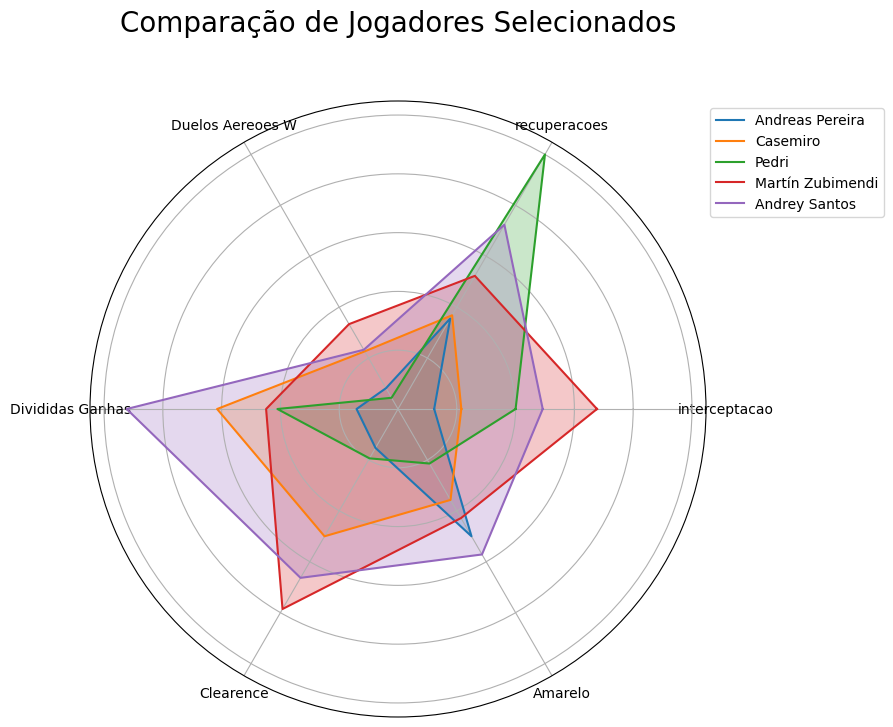

In [39]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['interceptacao','recuperacoes','Duelos Aereoes W','Divididas Ganhas','Clearence','Amarelo']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Andrey Santos','Pedri','Casemiro','Andreas Pereira','Martín Zubimendi']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Vol)